### 이상치 처리

In [1]:
'''
이상치 처리 
이상치는 분석자의 주관적인 판단에 의해서 제거하는 것이 일반적
IQR을 구해 이상치 제거하는 방법도 존재
'''

'\n이상치 처리 \n이상치는 분석자의 주관적인 판단에 의해서 제거하는 것이 일반적\nIQR을 구해 이상치 제거하는 방법도 존재\n'

In [2]:
import pandas as pd 
data = pd.read_csv('Ex_CEOSalary.csv', encoding = 'utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB


<AxesSubplot:>

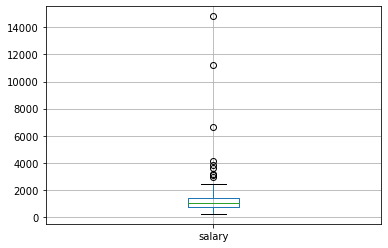

In [3]:
data.boxplot(column='salary')
# 상자도표를 보고 싶은 변수의 이름을 작성하면 상자 도표를 확인할 수 있으며 이상치 유무도 판단 가능

<AxesSubplot:>

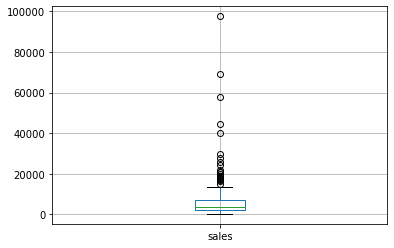

In [4]:
data.boxplot(column= 'sales')

<AxesSubplot:>

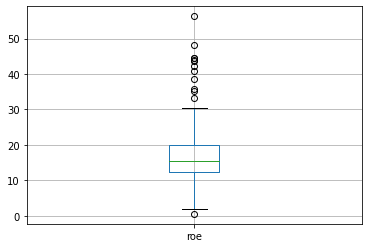

In [5]:
data.boxplot(column='roe')

In [6]:
# salary를 기준으로 IQR구하기 
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
print(IQR_salary)

671.0


<AxesSubplot:>

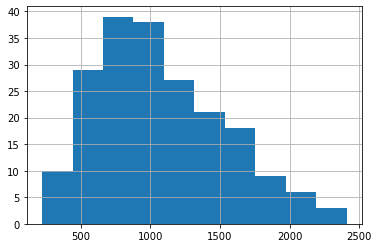

In [7]:
data_IQR = data[(data['salary'] < Q3_salary + IQR_salary*1.5) & (data['salary'] > Q1_salary - IQR_salary*1.5)]
# IQR은 3사분위수와 사분위 편차 * 1.5를 더한 값보다 작고 1사분위와 사분위 편차 1.5를 뺀 값보다 큰 값을 뜻함
# 이상치 분리
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

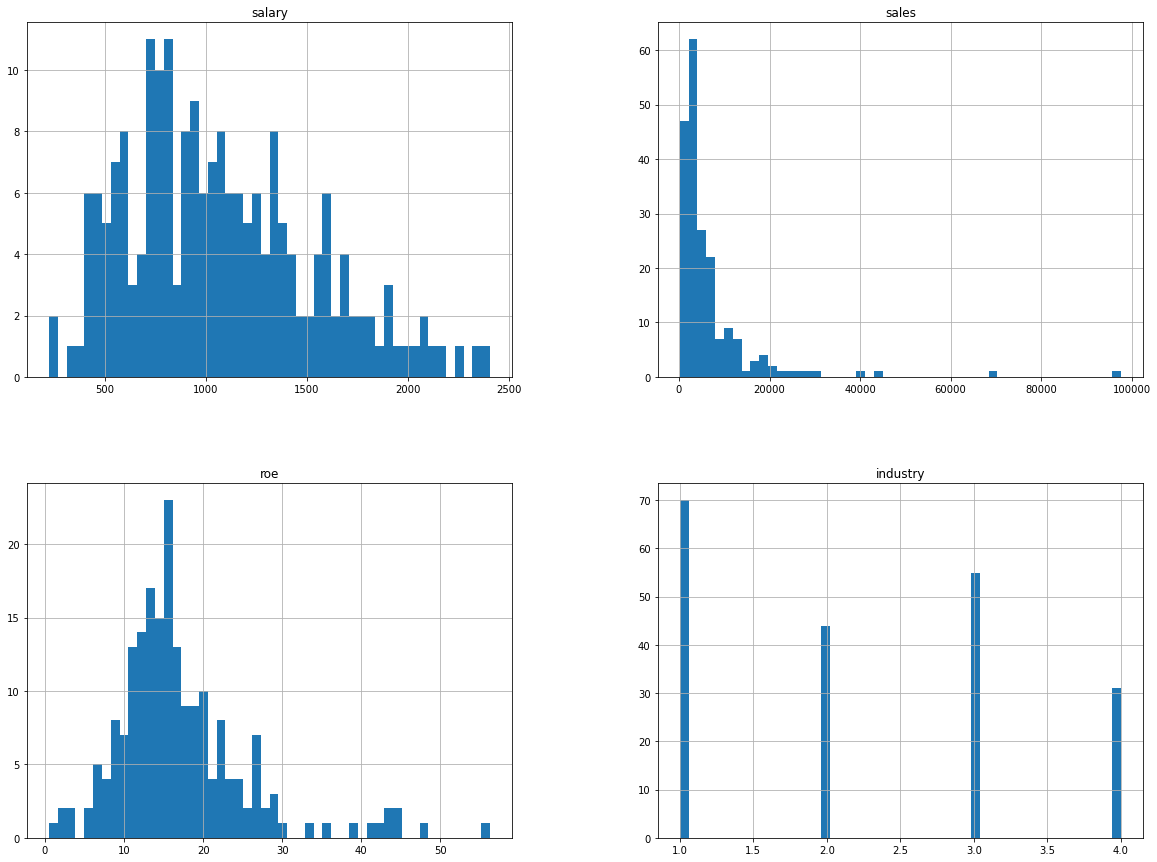

In [8]:
data_IQR.hist(bins=50, figsize=(20,15))
# IQR 기준으로 이상치 제거 
# sales는 아직도 이상치가 남아있는 것으로 확인

In [9]:
data_IQR.corr()

,salary,sales,roe,industry
salary,1.000000,0.335446,0.289704,-0.202648
sales,0.335446,1.000000,-0.065034,-0.069790
roe,0.289704,-0.065034,1.000000,-0.024423
industry,-0.202648,-0.069790,-0.024423,1.000000


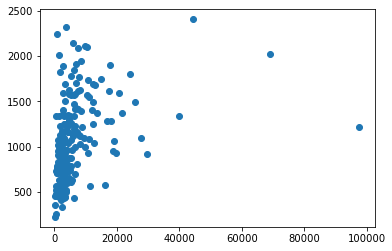

In [10]:
import matplotlib.pyplot as plt 
plt.scatter(data_IQR['sales'], data_IQR['salary'])
plt.show()
# sales가 x, salary가 y로 이상치가 여전히 존재하고 있음

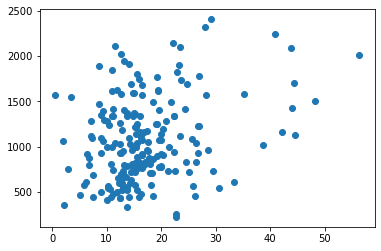

In [11]:
import matplotlib.pyplot as plt 
plt.scatter(data_IQR['roe'], data_IQR['salary'])
plt.show()

### sales 변수 이상치 처리 

In [12]:
Q1_sales = data['sales'].quantile(0.25)
Q3_sales = data['sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
print(IQR_sales)

4966.6999511718695


<AxesSubplot:>

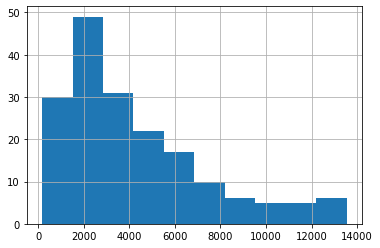

In [13]:
data_IQR = data[((data['sales'] < Q3_sales + IQR_sales * 1.5) & (data['sales'] > Q1_sales - IQR_sales * 1.5)) & 
((data['salary'] < Q3_salary + IQR_salary * 1.5) & (data['salary'] > Q1_salary -IQR_salary * 1.5))]
# sales와 salary의 조건을 모두 걸어서 이상치 제거 작업 진행
data_IQR['sales'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

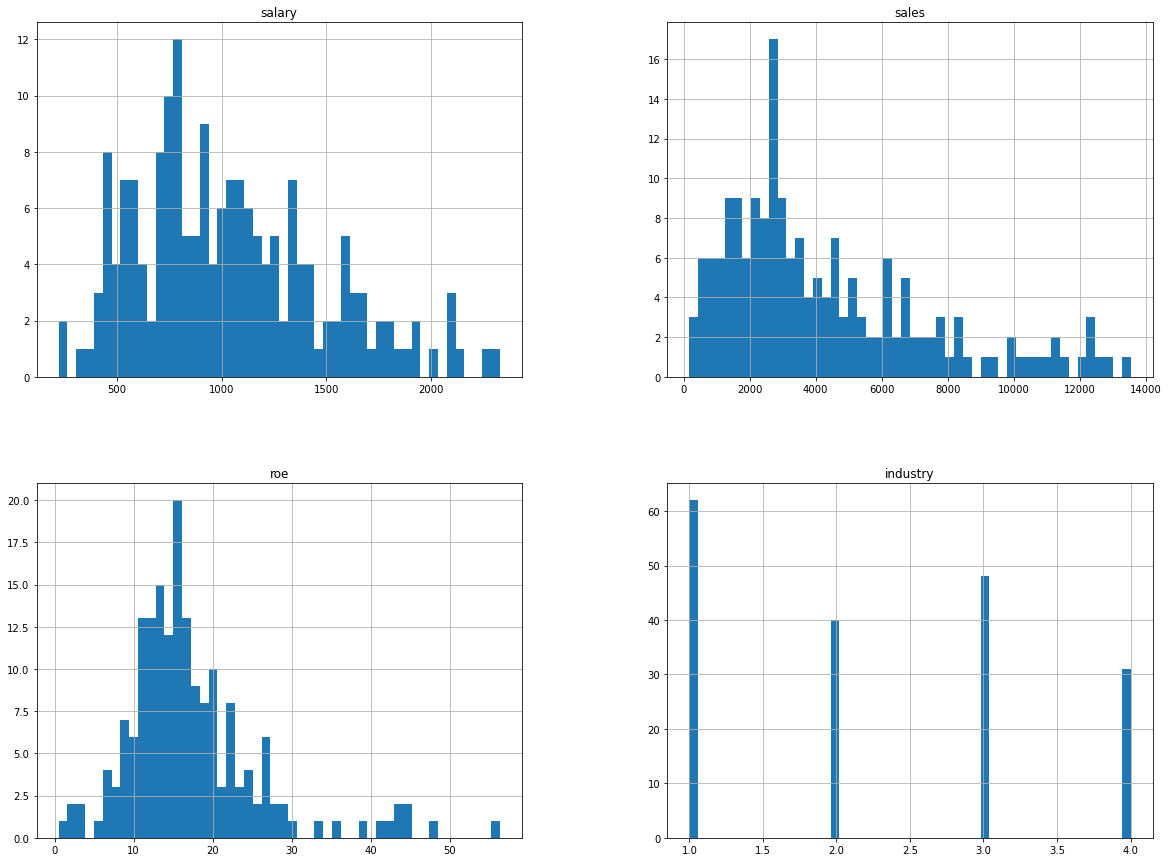

In [14]:
data_IQR.hist(bins=50, figsize=(20,15))
# 이상치에 의한 왜곡현상이 대부분 해결된 것을 확인할 수 있음

In [15]:
data_IQR.corr()
# 이상치를 제거함으로써 상관계수가 다소 높아진 것을 확인할 수 있음

,salary,sales,roe,industry
salary,1.000000,0.471278,0.299153,-0.223324
sales,0.471278,1.000000,-0.076046,-0.106834
roe,0.299153,-0.076046,1.000000,-0.050202
industry,-0.223324,-0.106834,-0.050202,1.000000
